# DataCamp - Data Scientist Career Track (Python)

##    Network Analysis in Python (Part 1)               


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Network Analysis in Python (Part 1)/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pickle

import networkx as nx
import nxviz as nv
from nxviz import CircosPlot, ArcPlot

from itertools import combinations


##    CHAPTER 1  - Introduction to networks


#### Exercício 1 - Introduction to networks

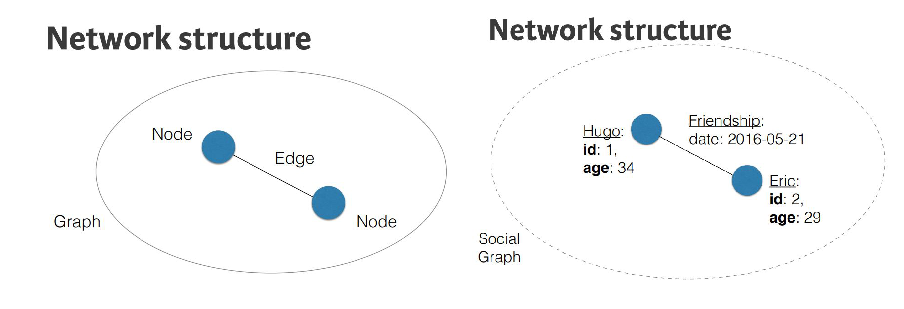

[(1, {'label': 'blue'}), (2, {}), (3, {})]


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


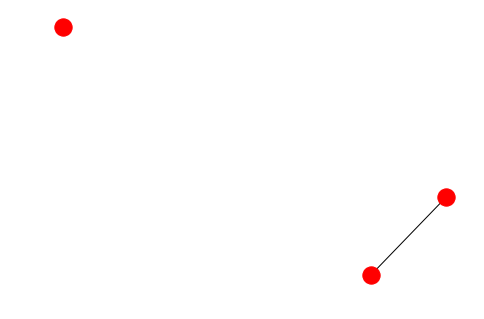

In [4]:
#vídeo

# Networks
# ● Examples:
#   ● Social
#   ● Transportation
# ● Model relationships between entities

# ● Insights:
#   ● Important entities: influencers in social network
#   ● Pathfinding: most efficient transport path
#   ● Clustering: finding communities

# Network structure
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "graph_structure.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "network_structure.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

###############################

import networkx as nx

G = nx.Graph()

G.add_nodes_from([1, 2, 3])
G.nodes()

G.add_edge(1, 2)
G.edges() 

# NetworkX API basics
G.node[1]['label'] = 'blue'

print(G.nodes(data=True))  # this returns a list of 2 tuples in which the first element of each tuple is the node and the 
                           # second element is a dictionary in which the key-value pairs correspond to the metadata

nx.draw(G) 

plt.show()

Exercício 2

In [5]:
# What is a network?
# Let's think again about examples of networks. Which of the following data is least easily modeled as a network?

print("phone numbers in a telephone directory")

phone numbers in a telephone directory


Exercício 3

In [6]:
# Basics of NetworkX API, using Twitter network

import networkx as nx

# To get you up and running with the NetworkX API, we will run through some basic functions that let you query a Twitter 
# network that has been pre-loaded for you and is available in the IPython Shell as T.

import pickle

T = pickle.load(open(data_folder + "ego-twitter.p", "rb" ) )

#What is the size of the graph T, 
print("size of the graph T:", len(T), "\n")

# the type of T.nodes(), 
print("type of nodes:", type(T.nodes()), "\n")

# and the data structure of the third element of the last edge listed in T.edges(data=True)?
print("data structure of the third element of the last edge listed in T.edges(data=True):\n", 
     list(T.edges(data=True))[-1], "\n \n Aanswer: 23369, networkx.NodeView, dict.")

# first five edges
list(T.edges(data=True))[:5]

size of the graph T: 23369 

type of nodes: <class 'networkx.classes.reportviews.NodeView'> 

data structure of the third element of the last edge listed in T.edges(data=True):
 (23324, 23336, {'date': datetime.date(2010, 9, 20)}) 
 
 Aanswer: 23369, networkx.NodeView, dict.


[(1, 3, {'date': datetime.date(2012, 11, 16)}),
 (1, 4, {'date': datetime.date(2013, 6, 7)}),
 (1, 5, {'date': datetime.date(2009, 7, 27)}),
 (1, 6, {'date': datetime.date(2014, 12, 18)}),
 (1, 7, {'date': datetime.date(2010, 10, 18)})]

Exercício 4

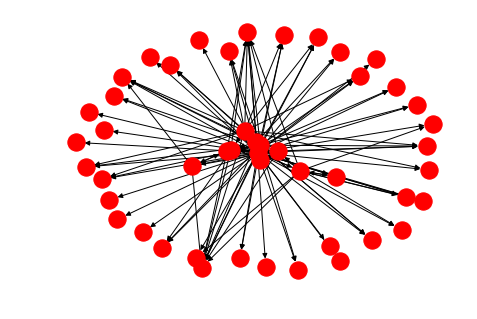

In [7]:
# Basic drawing of a network using NetworkX

# NetworkX provides some basic drawing functionality that works for small graphs. We have selected a subset of nodes from 
# the graph for you to practice using NetworkX's drawing facilities. It has been pre-loaded as T_sub.

T_sub = T.subgraph([n for n,v in T.nodes(data=True)][:48])    # nodes

# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph to screen
nx.draw(T_sub)
plt.show()

Exercício 5

In [8]:
# Queries on a graph

import datetime

# Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize 
# components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for
# "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods.

# The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows
# the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves
# the corresponding metadata associated with the nodes and edges as well.

# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < datetime.date(2010, 1, 1)]


# print first 5
print(noi[:5])
print(eoi[:5])

[(n, d) for n,d in T.nodes(data=True)][:5]

[5, 9, 13, 15, 17]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16)]


[(1, {'category': 'I', 'occupation': 'politician'}),
 (3, {'category': 'D', 'occupation': 'celebrity'}),
 (4, {'category': 'I', 'occupation': 'politician'}),
 (5, {'category': 'I', 'occupation': 'scientist'}),
 (6, {'category': 'D', 'occupation': 'politician'})]

#### Exercício 6 - Types of graphs

<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.digraph.DiGraph'>


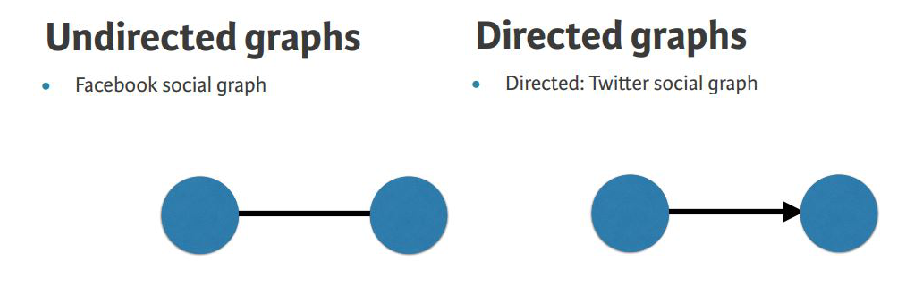

<class 'networkx.classes.multigraph.MultiGraph'>
<class 'networkx.classes.multidigraph.MultiDiGraph'>


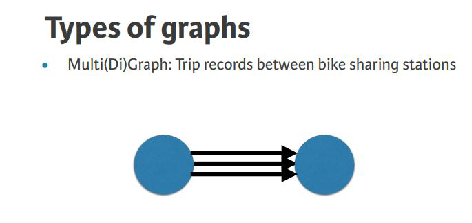

In [9]:
#vídeo

import networkx as nx

# Undirected graphs
#  - Facebook social graph

G = nx.Graph()

print(type(G))

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "undirected_graph.jpg")
plt.axis('off')
plt.imshow(imagem)

#################################################

# Directed graphs
# - Directed: Twitter social graph

D = nx.DiGraph() 

print(type(D))

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "directed_graph.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

##########################################################

# Multi(Di)Graph: Trip records between bike sharing stations

M = nx.MultiGraph()
print(type(M))

MD = nx.MultiDiGraph()
print(type(MD))

imagem = plt.imread(data_folder + "multi_graph.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

########################################################

# Weights on graphs
#  - Edges can contain weights

# Self-loops
# - Nodes that are connected to themselves


Exercício 7

In [10]:
# Checking the un/directed status of a graph

# which one corresponds to the type of graph that T is?

print("T is a {} type of graph".format(type(T)))

T is a <class 'networkx.classes.digraph.DiGraph'> type of graph


Exercício 8

In [11]:
# Specifying a weight on edges

# Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is 
# indicated by the 'weight' key in the metadata dictionary.

# Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance
# by running the commands T.edges[1, 10] and then T.edges[10, 1]. Note how there's only one field, and now you're going to 
# add another field, called 'weight'.

print(T.edges[1, 10], "\n")
#print(T.edges[10, 1])

#####################################

# Set the weight of the edge
weight = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        d['weight'] = 1.1

# Being able to iterate over graphs like this to explore and alter their metadata is an important skill.

{'date': datetime.date(2012, 9, 8)} 



Exercício 9

In [12]:
# Checking whether there are self-loops in the graph

# NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network 
# graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.


# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """ Finds all nodes that have self-loops in the graph G. """
    
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

###############################################################
# ver o número de selfloops no grafo T
T.number_of_selfloops()

42

#### Exercício 10 - Network visualization

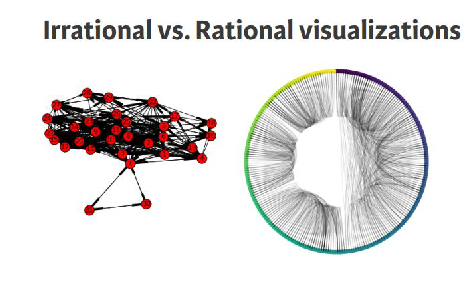

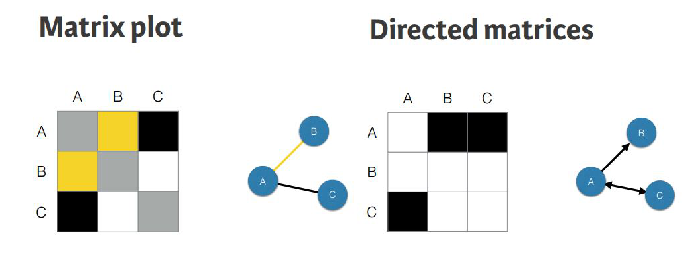

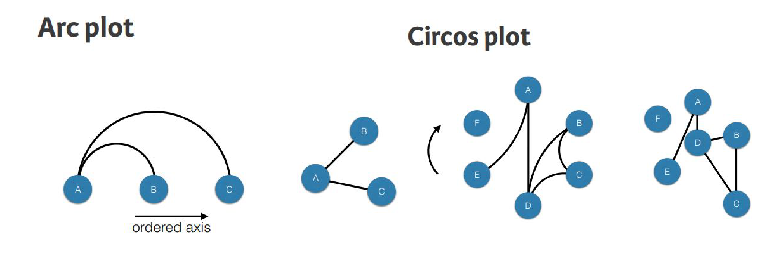

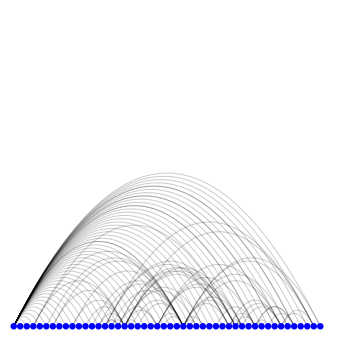

In [13]:
#vídeo

# Irrational vs. Rational visualizations
imagem = plt.imread(data_folder + "irrational_rational_visualizations.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Visualizing networks
#  ● Matrix plots
#  ● Arc plots
#  ● Circos plots

#######################################################

# Matrix plots
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "matrix_1.jpg")
plt.axis('off')
plt.imshow(imagem)

# Directed matrices
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "matrix_2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

#########################

# Arc plots
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "arc_plot.jpg")
plt.axis('off')
plt.imshow(imagem)

#########################

# Circos Plots
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "circos_plot.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0, hspace=0)
plt.show()

#########################

# nxviz API

import nxviz as nv
import matplotlib.pyplot as plt

ap = nv.ArcPlot(T_sub)

ap.draw()
plt.show()

Exercício 11

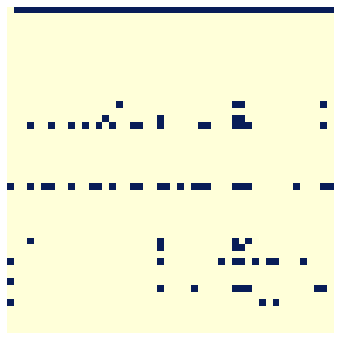

In [14]:
# Visualizing using Matrix plots

import networkx as nx

# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T_sub)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T_sub)  # vou usar o T_sub em vez do T -- muito mais rápido

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()


Exercício 12

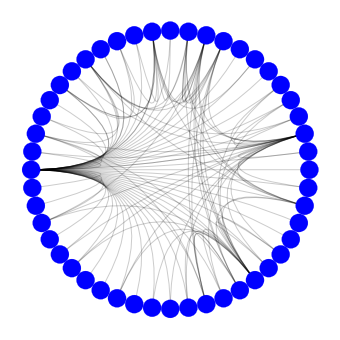

In [15]:
# Visualizing using Circos plots

# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T_sub)

# Draw c to the screen
c.draw()

plt.show()

# In the Chapter 4 Case Study, you'll learn how to customize CircosPlots to make them more informative.

Exercício 13

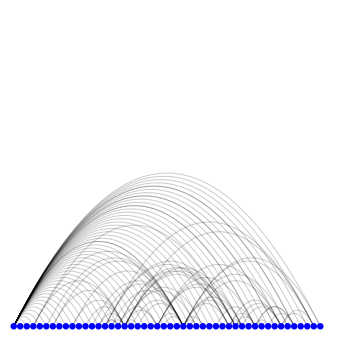

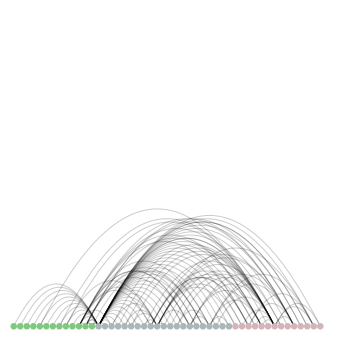

Notice the node coloring in the customized ArcPlot compared to the uncustomized version. In the customized ArcPlot,
the nodes in each of the categories - 'I', 'D', and 'P' - have their own color. 


In [16]:
# Visualizing using Arc plots

# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T_sub)

# Draw a to the screen
a.draw()
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T_sub, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()
plt.show()

print("""Notice the node coloring in the customized ArcPlot compared to the uncustomized version. In the customized ArcPlot,
the nodes in each of the categories - 'I', 'D', and 'P' - have their own color. """)

# CHAPTER 2 - Important nodes


#### Exercício 1 - Degree centrality

In [17]:
#vídeo

# Important nodes
#  ● Which nodes are important?
#  ● Degree centrality
#  ● Betweenness centrality

# Important nodes
#  ● Which centre node might be more important?

# Degree centrality
#   ● Definition:
#      (Number of neighbors I have) / (Number of neighbors I could possibly have)

# se houver self-nodes estes contam como neighbor, caso contrário não.

#   ● Examples of nodes with high degree centrality:
#   ● Twitter broadcasters
#   ● Airport transportation hubs
#   ● Disease super-spreaders

T_sub.edges() 

print(list(T_sub.neighbors(1)), "\n")  # neighbors of node 1

print(list(T_sub.neighbors(43)), "\n")  # neighbors of node 43

# T_sub.neighbors(100)  ---->  NetworkXError: The node 100 is not in the graph.

print(nx.degree_centrality(T_sub))  # the key is the node, the value is the degre centrality


[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 

[24, 29, 35, 36, 37, 47, 48] 

{1: 1.0851063829787233, 3: 0.02127659574468085, 4: 0.02127659574468085, 5: 0.0851063829787234, 6: 0.02127659574468085, 7: 0.0425531914893617, 8: 0.06382978723404255, 9: 0.02127659574468085, 10: 0.02127659574468085, 11: 0.06382978723404255, 12: 0.02127659574468085, 13: 0.0425531914893617, 14: 0.0425531914893617, 15: 0.06382978723404255, 16: 0.1276595744680851, 17: 0.06382978723404255, 18: 0.1276595744680851, 19: 0.3404255319148936, 20: 0.06382978723404255, 21: 0.06382978723404255, 22: 0.02127659574468085, 23: 0.02127659574468085, 24: 0.1702127659574468, 25: 0.0425531914893617, 26: 0.02127659574468085, 27: 0.0425531914893617, 28: 0.48936170212765956, 29: 0.06382978723404255, 30: 0.06382978723404255, 31: 0.06382978723404255, 32: 0.02127659574468085, 33: 0.0425531914893617, 34: 

Exercício 2

In [18]:
# Compute number of neighbors for each node

# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

print("""\nIt looks like 25 nodes in graph T have 6 neighbors.
The number of neighbors a node has is one way to identify important nodes.""")


{22533, 1803, 11276, 11279, 6161, 4261, 10149, 3880, 16681, 5420, 14898, 64, 14539, 6862, 20430, 9689, 475, 1374, 6112, 9186, 17762, 14956, 2927, 11764, 4725}

It looks like 25 nodes in graph T have 6 neighbors.
The number of neighbors a node has is one way to identify important nodes.


Exercício 3

In [19]:
# Compute degree distribution

# Compute the degree of every node: degrees
degrees = [len(list(T_sub.neighbors(n))) for n in T_sub.nodes()]   # substitui T pela T_sub para ser mais curto

# Print the degrees
print(degrees)

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 15, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 9, 0, 0, 1, 7, 0, 3, 0, 0, 0, 0]


Exercício 4

The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors 
divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible
neighbors a node could have could also include the node itself.


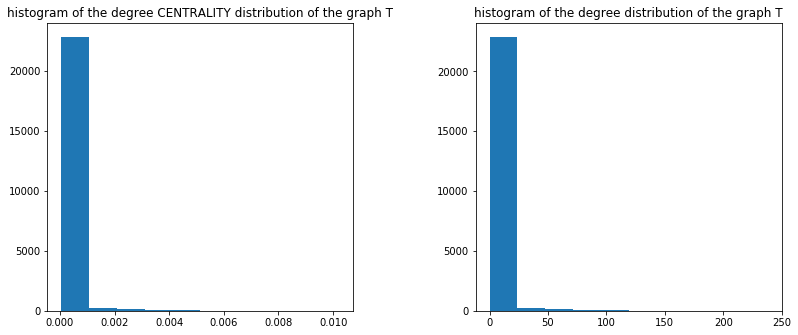

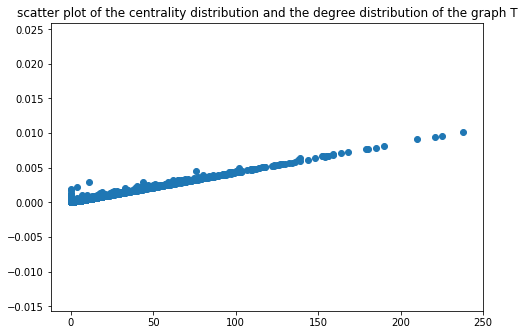

 Given the similarities of their histograms, it should not surprise you to see a perfect correlation between the
centrality distribution and the degree distribution.


In [20]:
# Degree centrality distribution

# The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by 
# all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a 
# node could have could also include the node itself.

# The nx.degree_centrality(G) function returns a dictionary, where the keys are the nodes and the values are their degree
# centrality values.

# The degree distribution degrees you computed in the previous exercise using the list comprehension has been pre-loaded.

degrees = [len(list(T.neighbors(n))) for n in T.nodes()]    # agora com T

###############################################################################


print("""The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors 
divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible
neighbors a node could have could also include the node itself.""")

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.subplot(1, 2, 1)
plt.hist(list(deg_cent.values()))
plt.title("histogram of the degree CENTRALITY distribution of the graph T")

# Plot a histogram of the degree distribution of the graph
plt.subplot(1, 2, 2)
plt.hist(degrees)
plt.title("histogram of the degree distribution of the graph T")
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1, wspace=0.4, hspace=0)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.scatter(degrees, list(deg_cent.values()))
plt.title("scatter plot of the centrality distribution and the degree distribution of the graph T")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.4, hspace=0)
plt.show()


print(""" Given the similarities of their histograms, it should not surprise you to see a perfect correlation between the
centrality distribution and the degree distribution.""")

#### Exercício 5 - Graph algorithms

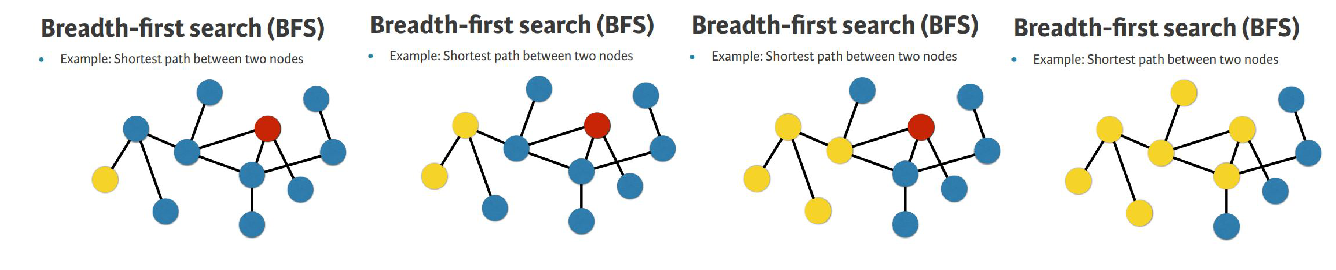

T_sub number of edges: 119
T_sub number of nodes: 48

Going from node 16 to node 29: we have a path, by going from 16 to 1, and from there to 29:

list of neighbors of node 16: [18, 35, 36, 48]
list of neighbors of node 1: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [21]:
#vídeo

# Finding paths
#  ● Pathfinding is important for
#  ● Optimization: e.g. shortest transport paths
#  ● Modeling: e.g. disease spread, information passing
#  ● Algorithm: Breadth-first search


# Breadth-first search (BFS)
#  ● Example: Shortest path between two nodes

plt.subplot(1, 4, 1)
imagem = plt.imread(data_folder + "bfs_1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 4, 2)
imagem = plt.imread(data_folder + "bfs_2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 4, 3)
imagem = plt.imread(data_folder + "bfs_3.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 4, 4)
imagem = plt.imread(data_folder + "bfs_4.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=-1, right=3, top=1, wspace=0, hspace=0)
plt.show()

# Recall: Neighbors

T_sub

print("T_sub number of edges:", len(T_sub.edges()))

print("T_sub number of nodes:", len(T_sub.nodes()))

print("\nGoing from node 16 to node 29: we have a path, by going from 16 to 1, and from there to 29:")
print("\nlist of neighbors of node 16:", list(T_sub.neighbors(16)))
print("list of neighbors of node 1:", list(T_sub.neighbors(1)))


Exercício 6

In [22]:
# Shortest Path I

# You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding
# between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and
# iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

# Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a
# later exercise.

# In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken
#into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

#######################################################################

# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break


Exercício 7

In [23]:
# Shortest Path II

# Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to
# extend the same function to write the code for the condition where the destination node is not present in the neighbors.

def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])


Exercício 8

In [24]:
# Shortest Path III

# final version:

def path_exists(G, node1, node2):
    """ This function checks whether a path exists between two nodes (node1, node2) in graph G. """
    
    visited_nodes = set()
    
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            return False


#### Exercício 9 - Betweenness centrality

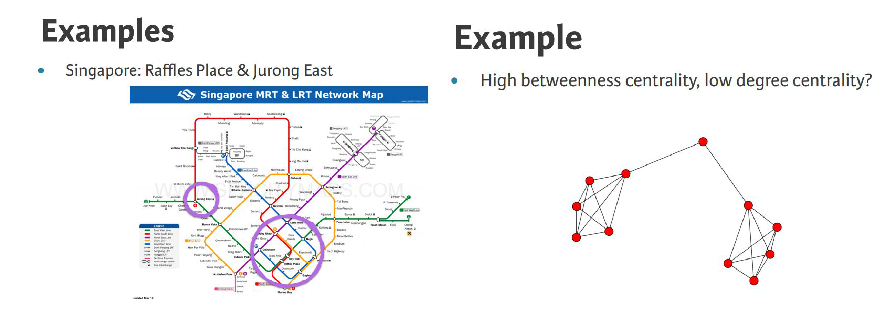

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

In [25]:
#vídeo

# All shortest paths
#  ● Set of paths
#  ● Each path is shortest path between a given pair of nodes
#  ● Done for all node pairs

# Betweenness centrality

#  ● Definition:  (num. shortest paths through node) / (all possible shortest paths)

# ● Applications:
#   ● Bridges between liberal- and conservativeleaning Twitter users
#   ● Critical information transfer links

#####################################################

# Examples
#  ● Singapore: Raffles Place & Jurong East
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "singapore.jpg")
plt.axis('off')
plt.imshow(imagem)

# Example
# ● High betweenness centrality, low degree centrality?
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "high_betweeness.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

############################

import networkx as nx

G = nx.barbell_graph(m1=5, m2=1)

nx.betweenness_centrality(G)


Exercício 10

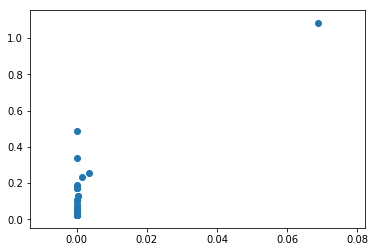

In [26]:
# NetworkX betweenness centrality on a social network

# Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is 
# defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

# NetworkX provides the nx.betweenness_centrality(G) function for computing the betweenness centrality of every node in a 
# graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

#################################################

# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T_sub)   # vou usar o T_sub pq n demora tanto

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T_sub)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

Exercício 11

In [27]:
# Deep dive - Twitter network

# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

print("\nnode 11824 has the highest degree centrality.")

{11824}

node 11824 has the highest degree centrality.


Exercício 12

In [28]:
%%script false
# Deep dive - Twitter network part II

# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())


Couldn't find program: 'false'


# Chapter 3 - Structures

#### Exercício 1 - Cliques & communities

In [29]:
#vídeo

# Cliques
#  ● Social cliques: tightly-knit groups
#  ● Network cliques: completely connected graphs

# Simplest complex clique: a triangle

# Triangle applications
#  ● Friend recommendation systems

# Clique code

from itertools import combinations

for n1, n2 in combinations(G.nodes(), 2):
    print(n1, n2) 
    

0 1
0 2
0 3
0 4
0 6
0 7
0 8
0 9
0 10
0 5
1 2
1 3
1 4
1 6
1 7
1 8
1 9
1 10
1 5
2 3
2 4
2 6
2 7
2 8
2 9
2 10
2 5
3 4
3 6
3 7
3 8
3 9
3 10
3 5
4 6
4 7
4 8
4 9
4 10
4 5
6 7
6 8
6 9
6 10
6 5
7 8
7 9
7 10
7 5
8 9
8 10
8 5
9 10
9 5
10 5


Exercício 2

In [30]:
# Identifying triangle relationships

from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

# You're going to modify this function in the next exercise to extract all nodes involved in a triangle relationship with 
# a given node.

Exercício 3

In [31]:
# Finding nodes involved in triangles

from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement to check that the number of nodes involved in a triangle relationship with node 1 of graph
# T is equal to 23.
assert len(nodes_in_triangle(T, 1)) == 23   # yes

print("node 1 is in a triangle relationship with 23 other nodes")

node 1 is in a triangle relationship with 23 other nodes


Exercício 4

In [32]:
# Finding open triangles

from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """ Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`."""
    
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
            
            in_open_triangle = True
            
            break
            
    return in_open_triangle
    
# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print("It looks like {} nodes in graph T are in open triangles!".format(num_open_triangles))

It looks like 908 nodes in graph T are in open triangles!


#### Exercício 5 - Maximal cliques

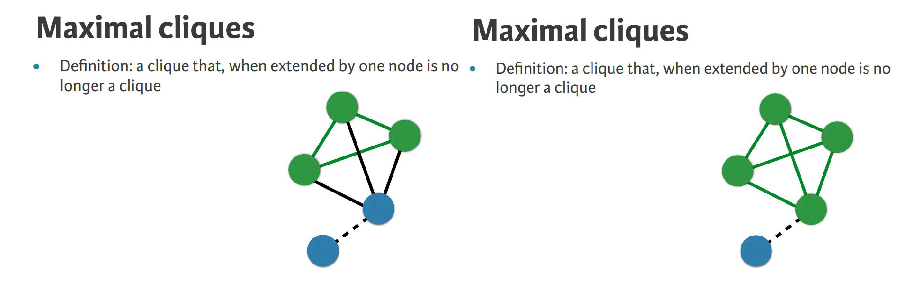

list of cliques in G: [[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]


In [33]:
#vídeo

# Maximal cliques
#  ● Definition: a clique that, when extended by one node is no longer a clique

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "max_clique.jpg")
plt.axis('off')
plt.imshow(imagem)

# Example
# ● High betweenness centrality, low degree centrality?
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "max_clique_2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()


# Applications: community finding

# Communities
#  ● Find cliques
#  ● Find unions of cliques

# NetworkX API
#  ● find_cliques finds all maximal cliques

#################################################

# Maximal cliques

import networkx as nx

G = nx.barbell_graph(m1=5, m2=1)

nx.find_cliques(G)

print("list of cliques in G: {}".format(list(nx.find_cliques(G))))

# desenho com os grafos dos cliques

Exercício 6

In [34]:
# Finding all maximal cliques of size "n"

# Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques 
# are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding 
#communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph:
# nx.find_cliques(G)

###########################################

# Define maximal_cliques()
def maximal_cliques(G, size):
    """ Finds all maximal cliques in graph `G` that are of size `size`. """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
#assert len(maximal_cliques(T, 3)) == 33


#### Exercício 7 - Subgraphs

[]


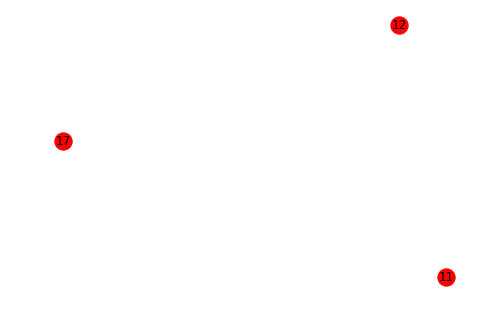

In [35]:
#vídeo

# Subgraphs
#  ● Visualize portions of a large graph
#  ● Paths
#  ● Communities/cliques
#  ● Degrees of separation from a node

import networkx as nx

G = nx.erdos_renyi_graph(n=20, p=0.2)
G.nodes()

nodes = G.neighbors(8)
nodes
# nodes.append(8)   ---> erro

#################################3

# Subgraphs
G_eight = G.subgraph(nodes)

print(G_eight.edges())
G_eight
G

nx.draw(G_eight, with_labels=True)
plt.show()

Exercício 8

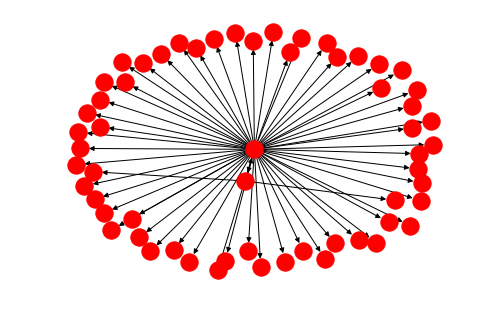

In [36]:
# Subgraphs I

# There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into 
# another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph)
# that is comprised of the iterable of nodes that was passed in. (usei isto para construir T_sub)

##########################################

nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """ Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors."""
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

Exercício 9

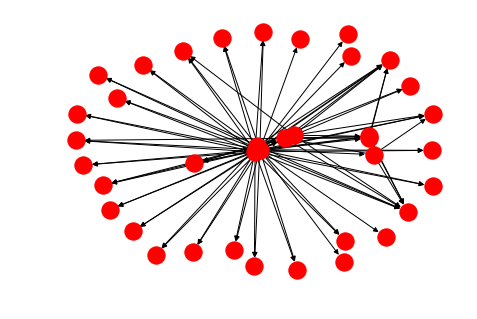

In [37]:
# Subgraphs II   ----> vou usar o T_sub em vez de T

# Extract the nodes of interest: nodes
nodes = [n for n, d in T_sub.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T_sub.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub_2 = T_sub.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub_2)
plt.show()

# Chapter 4 - Bringing it all together

#### Exercício 1 - Case study

In [38]:
#vídeo

# Data
#  ● Github user collaboration network
#  ● Nodes: users
#  ● Edges: collaboration on same GitHub repository
#  ● Goals:
#    ->● Analyze structure
#    ->● Visualize
#    ->● Build simple recommendation system

#Graph properties
import networkx as nx
G = nx.erdos_renyi_graph(n=20, p=0.2)
print(len(G.edges()))
print(len(G.nodes()))

print("degree_centrality:\n {}\n".format(nx.degree_centrality(G)))

print("betweenness_centrality:\n {}\n".format(nx.betweenness_centrality(G)))     

# Data
#  ● Number of nodes
#  ● Number of edges
#  ● Degree centrality distribution
#  ● Betweenness centrality distribution


46
20
degree_centrality:
 {0: 0.10526315789473684, 1: 0.2631578947368421, 2: 0.2631578947368421, 3: 0.3157894736842105, 4: 0.10526315789473684, 5: 0.3157894736842105, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.2631578947368421, 9: 0.2631578947368421, 10: 0.3157894736842105, 11: 0.15789473684210525, 12: 0.2631578947368421, 13: 0.10526315789473684, 14: 0.2631578947368421, 15: 0.2631578947368421, 16: 0.3684210526315789, 17: 0.15789473684210525, 18: 0.21052631578947367, 19: 0.3684210526315789}

betweenness_centrality:
 {0: 0.008771929824561403, 1: 0.03572124756335283, 2: 0.06257309941520466, 3: 0.0842801448064606, 4: 0.02037037037037037, 5: 0.09898357003620159, 6: 0.07004316346421609, 7: 0.06661793372319685, 8: 0.034600389863547756, 9: 0.0675508214981899, 10: 0.05634920634920635, 11: 0.021539961013645224, 12: 0.027151211361737673, 13: 0.021929824561403508, 14: 0.04503620161514897, 15: 0.10327206906154274, 16: 0.124812030075188, 17: 0.016617933723196882, 18: 0.1037593984962406, 19:

Exercício 2

In [39]:
# Characterizing the network (I)

# To start out, let's do some basic characterization of the network, by looking at the number of nodes and number of edges
# in a network. It has been pre-loaded as G. Your job in this exercise is to identify how many nodes and edges are present
# in the network. 

import pickle

G = pickle.load(open(data_folder + "github_users.p", "rb" ) )

print("There are {} nodes present in the network".format(len(G.nodes())))
print("There are {} edges present in the network".format(len(G.edges())))


There are 56519 nodes present in the network
There are 72900 edges present in the network


Exercício 3

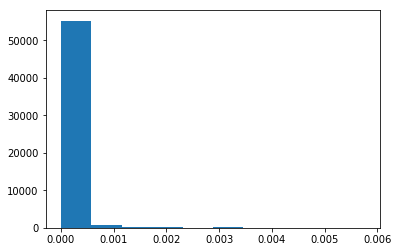

In [40]:
# Characterizing the network (II)

# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()


Exercício 4

In [41]:
%%script false   # demora mt tempo
# Characterizing the network (III)

# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))   
plt.show()

Couldn't find program: 'false'


#### Exercício 5 - Case study part II: Visualization

In [42]:
#vídeo

# nxviz API
import networkx as nx
import nxviz as nv

G = nx.erdos_renyi_graph(n=20, p=0.3)

# circ = nv.CircosPlot(G, node_color='key', node_group='key')
# circ.draw()

# Connected component subgraphs

import networkx as nx

G = nx.erdos_renyi_graph(n=100, p=0.03)

nx.connected_component_subgraphs(G)  # ---> 

list(nx.connected_component_subgraphs(G))

for g in list(nx.connected_component_subgraphs(G)):
    print(len(g.nodes())) 


88
1
1
2
1
1
1
1
2
1
1


Exercício 6

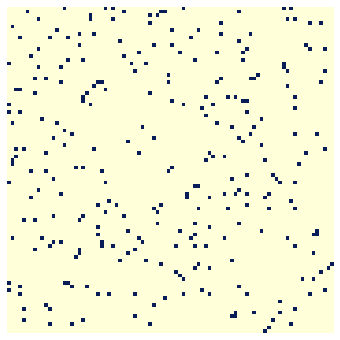

Recall that in a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to
whether an edge exists between the pairs of nodes.


In [43]:
# MatrixPlot

# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs)    # node_grouping='grouping' n deu

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

print("""Recall that in a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to
whether an edge exists between the pairs of nodes.""")

Exercício 7

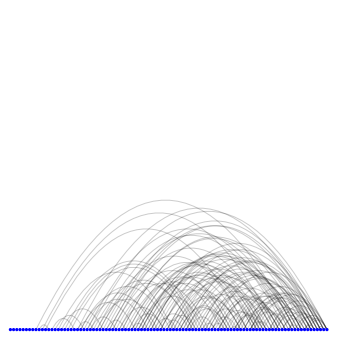

In [44]:
# ArcPlot

# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

Exercício 8

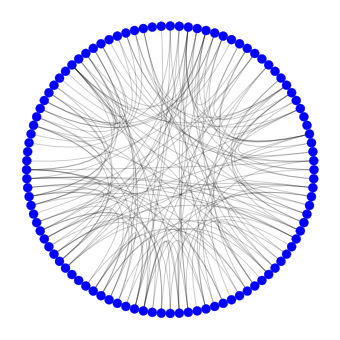

In [45]:
# CircosPlot

# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(G)  #, node_order='degree', node_color='grouping', node_grouping='grouping'

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

#### Exercício 9 - Case study part III: Cliques

In [46]:
%%script false
#vídeo

# Finding cliques
import networkx as nx
G = nx.erdos_renyi_graph(n=100, p=0.15)
nx.find_cliques(G)

for clique in nx.find_cliques(G):
    print(len(clique))
    


Couldn't find program: 'false'


Exercício 10

In [47]:
# Finding cliques (I)

# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))


142


Exercício 11

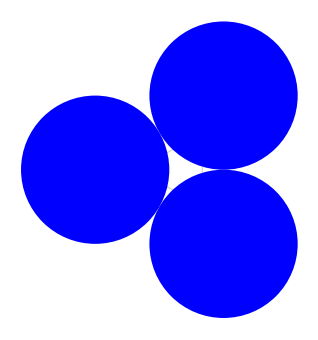

The subgraph consisting of the largest maximal clique has 4 users


In [48]:
# Finding cliques (II)

# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

print("The subgraph consisting of the largest maximal clique has 4 users")

#### Exercício 12 - Case study part IV: Final tasks

In [49]:
#vídeo

# Final tasks
# ● Find important users
# ● Find largest communities of collaborators
# ● Build a collaboration recommendation system


Exercício 13

In [50]:
# Finding important collaborators

# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if n == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


[]


Exercício 14

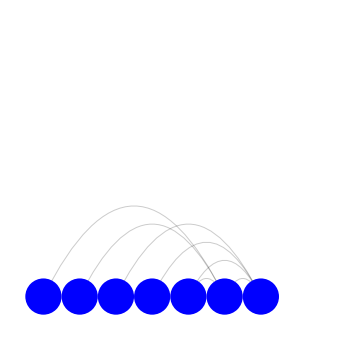

In [51]:
# Characterizing editing communities

# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()


Exercício 15

In [52]:
# Recommending co-editors who have yet to edit together

# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

            
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())

top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]

print(top10_pairs)


[]



#### Exercício 16 - end

In [53]:
#vídeo

# Fim